# Data loading

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('.../provaTfIdf2.csv', delimiter=',', skiprows=0, lineterminator='\n', low_memory=False)
df

,date,user,timestamp,clean,pos,neg,neu,compound,value,week,mean_tfIdf\r
0,2019-04-01,saifedean,2019-04-01 10:15:49+00,bitcoin standard available russian,0.0000,0.000,1.000,0.000,bull\r\r,14,0.455448
1,2019-04-01,bitsmart_btc,2019-04-01 18:02:45+00,btc last hour bitcoin bitsmart,0.0000,0.000,1.000,0.000,bull\r\r,14,0.388919
2,2019-04-01,bitcoinrate247,2019-04-01 02:00:02+00,average bitcoin market price usd eur,0.0000,0.000,1.000,0.000,bull\r\r,14,0.379981
3,2019-04-01,NumeroIogynow,2019-04-01 01:11:28+00,fraud march bitcoin still usd,-0.5859,0.487,0.513,0.000,bull\r\r,14,0.406407
4,2019-04-01,45Hits,2019-04-01 14:30:32+00,purchase scriptbay btc,0.0000,0.000,1.000,0.000,bull\r\r,14,0.475480
...,...,...,...,...,...,...,...,...,...,...,...
1274975,2019-11-23,stjrch_,2019-11-23 05:39:26+00,bitcoin life changer,0.0000,0.000,1.000,0.000,bull\r\r,47,0.496007
1274976,2019-11-23,Sprintx24,2019-11-23 05:39:21+00,cryptocurrency bitcoin,0.0000,0.000,1.000,0.000,bull\r\r,47,0.669561
1274977,2019-11-23,breakxbt,2019-11-23 05:38:40+00,bring btc charts imo,0.0000,0.000,1.000,0.000,bull\r\r,47,0.464592
1274978,2019-11-23,ganjesa,2019-11-23 05:40:23+00,cryptocurrency bitcoin,0.0000,0.000,1.000,0.000,bull\r\r,47,0.669561


In [3]:
df.columns = ['date', 'user', 'timestamp', 'tweet', 'pos', 'neg', 'neu', 'compound', 'value', 'week', 'mean_tfIdf']
#Trasformiamo bull e bear in una rappresentazione binaria
df['value'].replace(to_replace="bull.+", value=1, regex=True, inplace=True)
df['value'].replace(to_replace="bear.+", value=0, regex=True, inplace=True)
df

,date,user,timestamp,tweet,pos,neg,neu,compound,value,week,mean_tfIdf
0,2019-04-01,saifedean,2019-04-01 10:15:49+00,bitcoin standard available russian,0.0000,0.000,1.000,0.000,1,14,0.455448
1,2019-04-01,bitsmart_btc,2019-04-01 18:02:45+00,btc last hour bitcoin bitsmart,0.0000,0.000,1.000,0.000,1,14,0.388919
2,2019-04-01,bitcoinrate247,2019-04-01 02:00:02+00,average bitcoin market price usd eur,0.0000,0.000,1.000,0.000,1,14,0.379981
3,2019-04-01,NumeroIogynow,2019-04-01 01:11:28+00,fraud march bitcoin still usd,-0.5859,0.487,0.513,0.000,1,14,0.406407
4,2019-04-01,45Hits,2019-04-01 14:30:32+00,purchase scriptbay btc,0.0000,0.000,1.000,0.000,1,14,0.475480
...,...,...,...,...,...,...,...,...,...,...,...
1274975,2019-11-23,stjrch_,2019-11-23 05:39:26+00,bitcoin life changer,0.0000,0.000,1.000,0.000,1,47,0.496007
1274976,2019-11-23,Sprintx24,2019-11-23 05:39:21+00,cryptocurrency bitcoin,0.0000,0.000,1.000,0.000,1,47,0.669561
1274977,2019-11-23,breakxbt,2019-11-23 05:38:40+00,bring btc charts imo,0.0000,0.000,1.000,0.000,1,47,0.464592
1274978,2019-11-23,ganjesa,2019-11-23 05:40:23+00,cryptocurrency bitcoin,0.0000,0.000,1.000,0.000,1,47,0.669561


# BASELINE MODEL

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
#Con CountVectorizer convertiamo una collezione di testi in una matrice di conteggio dei tokens
#Vettorizziamo i tweets e costruiamo il vocabolario
vectorizer = CountVectorizer(min_df=5, lowercase=False)
vectorizer.fit(df['tweet'])
vectorizer.vocabulary_

{'bitcoin': 1915,
 'standard': 17762,
 'available': 1223,
 'russian': 16234,
 'btc': 2722,
 'last': 10839,
 'hour': 9364,
 'bitsmart': 2154,
 'average': 1235,
 'market': 11670,
 'price': 14622,
 'usd': 19938,
 'eur': 6880,
 'fraud': 7860,
 'march': 11650,
 'still': 17891,
 'purchase': 14968,
 'killing': 10624,
 'crypto': 4760,
 'great': 8613,
 'scaling': 16427,
 'debate': 5254,
 'one': 13319,
 'favorite': 7298,
 'quotes': 15121,
 'date': 5186,
 'put': 14993,
 'mb': 11814,
 'video': 20181,
 'file': 7438,
 'block': 2253,
 'sv': 18278,
 'cheaply': 3488,
 'efficiently': 6433,
 'right': 15969,
 'imagine': 9654,
 'thinking': 18832,
 'digital': 5708,
 'gold': 8457,
 'somethin': 17439,
 'network': 12803,
 'busy': 2961,
 'today': 19036,
 'advances': 272,
 'highest': 9130,
 'level': 11015,
 'make': 11560,
 'ran': 15194,
 'hr': 9387,
 'breaks': 2607,
 'news': 12837,
 'seems': 16623,
 'thanks': 18732,
 'left': 10952,
 'building': 2857,
 'like': 11105,
 'sc': 16421,
 'worth': 20894,
 'sell': 16648,

In [6]:
vectorizer.transform(df['tweet']).toarray()

In [7]:
from sklearn.model_selection import train_test_split
#prendiamo i tweets e le etichette e dividiamo in train e test set
tweets = df['tweet'].values
y = df['value'].values

tweets_train, tweets_test, y_train, y_test = train_test_split(tweets, y, test_size=0.3, random_state=1000)

In [8]:
#Vettorizziamo di nuovo con CountVectorize
vectorizer = CountVectorizer()
vectorizer.fit(tweets_train)

x_train = vectorizer.transform(tweets_train)
x_test  = vectorizer.transform(tweets_test)
x_train

<892486x76332 sparse matrix of type '<class 'numpy.int64'>'
	with 4079021 stored elements in Compressed Sparse Row format>

In [9]:
#Usiamo come classificatore la logistic regression, un modello lineare 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

print("Accuracy:", score)

Accuracy: 0.654705694729852


C:\Users\fazzo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

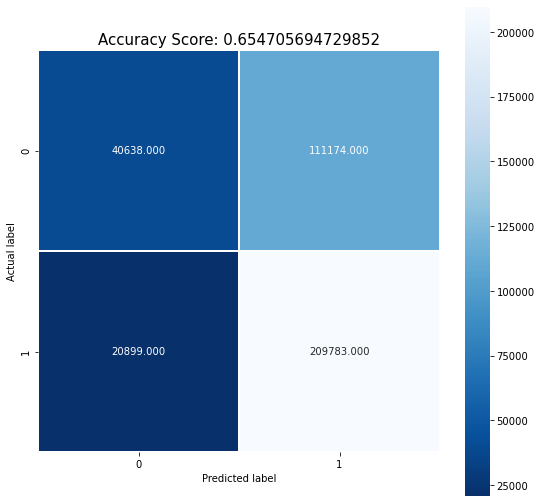

In [11]:
#Visualizziamo i risultati con una confusion matrix
plt.figure(figsize=(9,9))
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

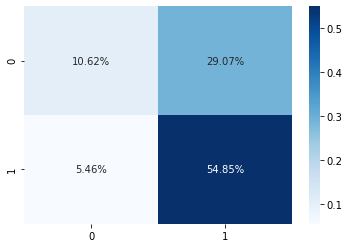

In [12]:
import numpy as np
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')

# KERAS 

In [13]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

#definiamo i parametri:
max_features = 5000 
maxlen = 100 
batch_size = 512  
embedding_dims = 5 
filters = 64 
kernel_size = 7 
hidden_dims = 20 
epochs = 6 

#GRID SEARCH
#{'vocab_size': 84265, 'num_filters': 64, 'maxlen': 100, 'kernel_size': 7, 'hidden_dims': 20, 'embedding_dim': 5}
#PARAMETRI USATI PRIMA
# filtri = 110 , maxlen = 100 , kernel = 3 , hidden_dims = 15 , embedding_dims = 15

In [14]:
from keras.preprocessing.text import Tokenizer
#usiamo Tokenizer per vettorizzare quindi trasformare il corpus in una lista di interi
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets_train)

X_train = tokenizer.texts_to_sequences(tweets_train)
X_test = tokenizer.texts_to_sequences(tweets_test)

vocab_size = len(tokenizer.word_index) + 1  # + 1 because per l'indice 0

In [15]:
from keras.preprocessing.sequence import pad_sequences
#aggiungiamo zeri per rendere tutte le sequenze della stessa lunghezza
print('Pad sequences (samples x time)')
pad_train = sequence.pad_sequences(X_train, maxlen=maxlen)
pad_test = sequence.pad_sequences(X_test, maxlen=maxlen)


Pad sequences (samples x time)


In [23]:
#costruiamo il modello
print('Build model...')
model = Sequential()

# iniziamo con un embedding layer che mappa gli indici del vocabolario agli embedding_dims
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))

# aggiungiamo un Convolution1D che impara i filtri per gruppi di parole di dimensione filters
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))

# usiamo max pooling
model.add(GlobalMaxPooling1D())

# aggiungiamo un vanilla hidden layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# aggiungiamo un vanilla hidden layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

#Proiettiamo su un output layer con una singola unità usando la funzione sigmoide
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 5)            25000     
_________________________________________________________________
dropout (Dropout)            (None, 100, 5)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 94, 64)            2304      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
activation (Activation)      (None, 20)  

In [24]:
#Addestriamo la rete neurale
history = model.fit(pad_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   shuffle=True,
                   validation_split=0.2,
                   verbose = 1)
#Valutiamo le accuratezze su train e test set
loss, accuracy = model.evaluate(pad_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(pad_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/6
1395/1395 [==============================] - 60s 43ms/step - loss: 0.6428 - accuracy: 0.6277 - val_loss: 0.6049 - val_accuracy: 0.6557
Epoch 2/6
1395/1395 [==============================] - 60s 43ms/step - loss: 0.6038 - accuracy: 0.6577 - val_loss: 0.5993 - val_accuracy: 0.6595
Epoch 3/6
1395/1395 [==============================] - 60s 43ms/step - loss: 0.5975 - accuracy: 0.6611 - val_loss: 0.5959 - val_accuracy: 0.6606
Epoch 4/6
1395/1395 [==============================] - 60s 43ms/step - loss: 0.5951 - accuracy: 0.6623 - val_loss: 0.5946 - val_accuracy: 0.6612
Epoch 5/6
1395/1395 [==============================] - 61s 44ms/step - loss: 0.5914 - accuracy: 0.6643 - val_loss: 0.5947 - val_accuracy: 0.6620
Epoch 6/6
1395/1395 [==============================] - 62s 44ms/step - loss: 0.5902 - accuracy: 0.6650 - val_loss: 0.5924 - val_accuracy: 0.6629
Training Accuracy: 0.6694
Testing Accuracy:  0.6627


In [22]:
from keras.backend import clear_session
clear_session()

In [25]:
# Plot per training e validation accuracy e per training e validation loss
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

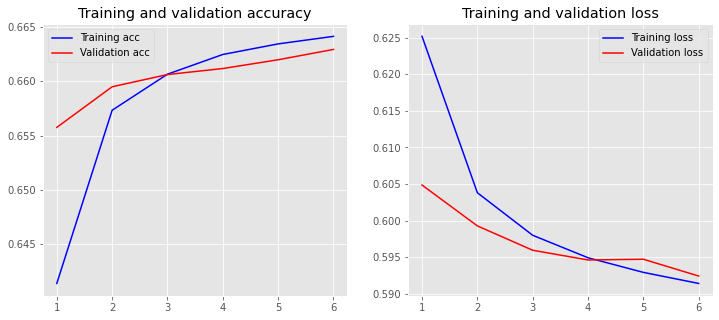

In [26]:
plot_history(history)

# Randomized search con k-fold cross validation

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [17]:
#Creiamo una funziona che genera il modello usato in precedenza ma che permette di 
#utilizzare i diversi parametri per ricerca
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen, hidden_dims):
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))

    model.add(GlobalMaxPooling1D())

    model.add(Dense(hidden_dims))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    
    model.add(Dense(hidden_dims))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

In [18]:
#Definiamo il parameter grid
param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[5, 10, 15],
                      maxlen=[maxlen],
                      hidden_dims = [10, 15, 20])

In [19]:
#Eseguiamo la grid search
model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=1)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=5, verbose=1, n_iter=3)
grid_result = grid.fit(pad_train, y_train)

#Valutiamo il test set
test_accuracy = grid.score(pad_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/6
71399/71399 [==============================] - 374s 5ms/step - loss: 0.6217 - accuracy: 0.6433
Epoch 2/6
71399/71399 [==============================] - 365s 5ms/step - loss: 0.5960 - accuracy: 0.6608
Epoch 3/6
71399/71399 [==============================] - 397s 6ms/step - loss: 0.5898 - accuracy: 0.6658
Epoch 4/6
71399/71399 [==============================] - 416s 6ms/step - loss: 0.5872 - accuracy: 0.6680
Epoch 5/6
71399/71399 [==============================] - 465s 7ms/step - loss: 0.5855 - accuracy: 0.6692
Epoch 6/6
17850/17850 [==============================] - 38s 2ms/step - loss: 0.5883 - accuracy: 0.6660
Epoch 1/6
71399/71399 [==============================] - 371s 5ms/step - loss: 0.6230 - accuracy: 0.6418
Epoch 2/6
71399/71399 [==============================] - 364s 5ms/step - loss: 0.5955 - accuracy: 0.6621
Epoch 3/6
71399/71399 [==============================] - 364s 5ms/step - loss: 0.5900 - accuracy: 0.6655
Epoch 4/6
71399/71399 [==============================] -

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 841.0min finished



89249/89249 [==============================] - 478s 5ms/step - loss: 0.6183 - accuracy: 0.6455
Epoch 2/6
89249/89249 [==============================] - 514s 6ms/step - loss: 0.5942 - accuracy: 0.6620
Epoch 3/6
89249/89249 [==============================] - 515s 6ms/step - loss: 0.5903 - accuracy: 0.6652
Epoch 4/6
89249/89249 [==============================] - 479s 5ms/step - loss: 0.5883 - accuracy: 0.6675
Epoch 5/6
89249/89249 [==============================] - 458s 5ms/step - loss: 0.5861 - accuracy: 0.6687
Epoch 6/6
38250/38250 [==============================] - 85s 2ms/step - loss: 0.5874 - accuracy: 0.6666


In [20]:
#Stampiamo gli esiti della ricerca per la miglior accuratezza
s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
output_string = s.format(
            df,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
print(output_string)

Running                date            user               timestamp  \
0        2019-04-01       saifedean  2019-04-01 10:15:49+00   
1        2019-04-01    bitsmart_btc  2019-04-01 18:02:45+00   
2        2019-04-01  bitcoinrate247  2019-04-01 02:00:02+00   
3        2019-04-01   NumeroIogynow  2019-04-01 01:11:28+00   
4        2019-04-01          45Hits  2019-04-01 14:30:32+00   
...             ...             ...                     ...   
1274975  2019-11-23         stjrch_  2019-11-23 05:39:26+00   
1274976  2019-11-23       Sprintx24  2019-11-23 05:39:21+00   
1274977  2019-11-23        breakxbt  2019-11-23 05:38:40+00   
1274978  2019-11-23         ganjesa  2019-11-23 05:40:23+00   
1274979  2019-11-23         xmr_btc  2019-11-23 05:40:02+00   

                                        tweet     pos    neg    neu  compound  \
0          bitcoin standard available russian  0.0000  0.000  1.000     0.000   
1              btc last hour bitcoin bitsmart  0.0000  0.000  1.000     0